In [120]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

# Load the dataset
df = pd.read_csv("Project-Management-2.csv")

# Data preparation
df['Start Date'] = pd.to_datetime(df['Start Date'], dayfirst=True, errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], dayfirst=True, errors='coerce')
df['Duration Days'] = (df['End Date'] - df['Start Date']).dt.days
df['Delay'] = df['Project Status'].apply(lambda x: 1 if x == 'Behind' else 0)
df['Budget Deviation'] = df['Budget'] - df['Actual Cost']
df['Resource Usage Ratio'] = df.apply(lambda row: row['Hours Spent'] / row['Duration Days'] if row['Duration Days'] > 0 else None, axis=1)

# Drop rows with missing values
df = df.dropna()

# Features (X) and target (y)
X = df[['Budget', 'Actual Cost', 'Hours Spent', 'Resource Usage Ratio', 'Delay']]
y = df['Duration Days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor - RMSE:", rmse)
print("Random Forest Regressor - R²:", r2)

# Convert predictions and actuals to categories for classification metrics
y_test_class = pd.qcut(y_test, q=3, labels=["Short", "Medium", "Long"])
y_pred_class = pd.qcut(y_pred, q=3, labels=["Short", "Medium", "Long"])

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='macro')

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_class)
y_pred_bin = lb.transform(y_pred_class)
auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')

print("Classification Accuracy:", accuracy)
print("F1 Score (Macro):", f1)
print("AUC Score (Macro):", auc)


Random Forest Regressor - RMSE: 63.49279711116844
Random Forest Regressor - R²: 0.7478648925278273
Classification Accuracy: 0.9166666666666666
F1 Score (Macro): 0.9166666666666666
AUC Score (Macro): 0.9375


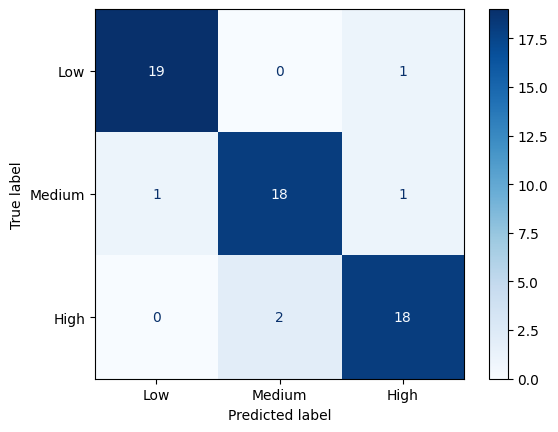

In [121]:
# Example: Convert continuous target into 3 classes (Low, Medium, High)
y_test_class = pd.qcut(y_test, q=3, labels=["Low", "Medium", "High"])
y_pred_class = pd.qcut(y_pred, q=3, labels=["Low", "Medium", "High"])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, y_pred_class, labels=["Low", "Medium", "High"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap='Blues')


In [117]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot - Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()
